In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.bandit import Bandit
from util.learner import Learner

In [42]:
x = np.random.normal(scale=1.5, size=(1, 10))
means = x[0].tolist()
y = []
for val in x[0]:
    y.append(np.random.normal(loc=val, size=(1, 1000))[0])


In [10]:
a_bandit = Bandit(y.copy(), means.copy())
learner = Learner(bandit=a_bandit, epsilon=0.1)
learner.learn_model()

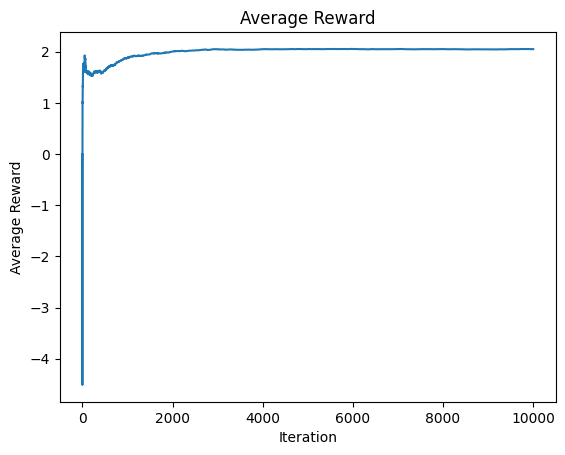

In [46]:
fig, ax = plt.subplots()
ax.plot(learner.get_avg_rewards())
ax.set_title("Average Reward")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Reward")
plt.show()

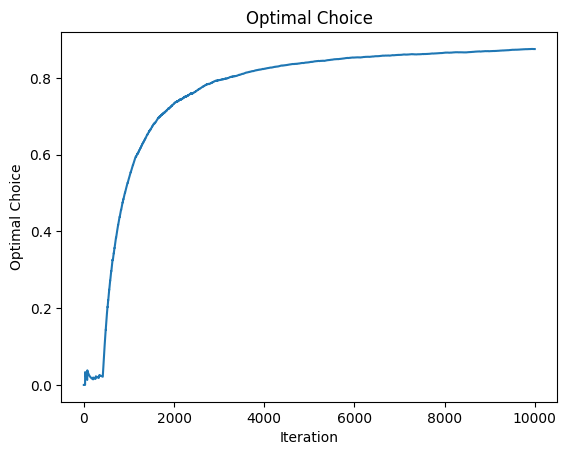

In [47]:
fig, ax = plt.subplots()
ax.plot(learner.get_optimal_choice())
ax.set_title("Optimal Choice")
ax.set_xlabel("Iteration")
ax.set_ylabel("Optimal Choice")
plt.show()

In [12]:
a_bandit.reset()
learner2 = Learner(bandit=a_bandit, epsilon=0.01)
learner2.learn_model()


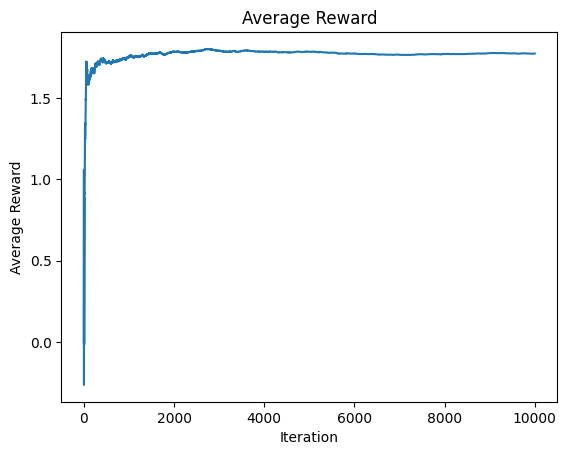

In [50]:
fig, ax = plt.subplots()
ax.plot(learner2.get_avg_rewards())
ax.set_title("Average Reward")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Reward")
plt.show()

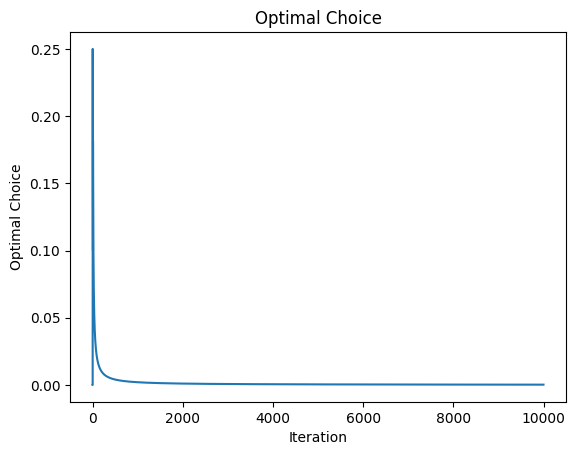

In [51]:
plt.show()
fig, ax = plt.subplots()
ax.plot(learner2.get_optimal_choice())
ax.set_title("Optimal Choice")
ax.set_xlabel("Iteration")
ax.set_ylabel("Optimal Choice")
plt.show()

In [14]:
running_optimal_choice_percentage = [0] * 1000
running_avg_reward = [0] * 1000
running_avg_reward_01_epsilon = [0] * 1000
running_optimal_choice_percentage_01_epsilon = [0] * 1000
running_avg_reward_0_epsilon = [0] * 1000
running_optimal_choice_percentage_0_epsilon = [0] * 1000
running_avg_reward_optimistic = [0] * 1000
running_optimal_choice_percentage_optimistic = [0] * 1000
running_avg_reward_4_epsilon = [0] * 1000
running_optimal_choice_percentage_4_epsilon = [0] * 1000

for i in range(1000):
    x = np.random.normal(scale=1.5, size=(1, 10))
    means = x[0].tolist()
    y = []
    for val in x[0]:
        y.append(np.random.normal(loc=val, size=(1, 1000))[0])
    a_bandit = Bandit(y.copy(), means.copy())
    learner = Learner(bandit=a_bandit, epsilon=0.1)
    learner.learn_model()
    running_avg_reward = [x + (1 / (i + 1)) * (y - x) for x, y in zip(running_avg_reward, learner.get_avg_rewards())]
    running_optimal_choice_percentage = [x + (1 / (i + 1)) * (y - x) for x, y in
                                         zip(running_optimal_choice_percentage, learner.get_optimal_choice())]
    
    a_bandit.reset()
    learner2 = Learner(bandit=a_bandit, epsilon=0.01)
    learner2.learn_model()
    running_avg_reward_01_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                     zip(running_avg_reward_01_epsilon, learner2.get_avg_rewards())]
    running_optimal_choice_percentage_01_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                    zip(running_optimal_choice_percentage_01_epsilon,
                                                        learner2.get_optimal_choice())]
    
    a_bandit.reset()
    learner3 = Learner(bandit=a_bandit, epsilon=0)
    learner3.learn_model()
    running_avg_reward_0_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                    zip(running_avg_reward_0_epsilon, learner3.get_avg_rewards())]
    running_optimal_choice_percentage_0_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                   zip(running_optimal_choice_percentage_0_epsilon,
                                                       learner3.get_optimal_choice())]
    
    a_bandit.reset()
    learner4 = Learner(bandit=a_bandit, epsilon=0.1, initial_value=5)
    learner4.learn_model()
    running_avg_reward_optimistic = [x + (1 / (i + 1)) * (y - x) for x, y in
                                     zip(running_avg_reward_optimistic, learner4.get_avg_rewards())]
    running_optimal_choice_percentage_optimistic = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                    zip(running_optimal_choice_percentage_optimistic,
                                                        learner4.get_optimal_choice())]
    
    a_bandit.reset()
    learner5 = Learner(bandit=a_bandit, epsilon=0.4)
    learner5.learn_model()
    running_avg_reward_4_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                    zip(running_avg_reward_4_epsilon, learner5.get_avg_rewards())]
    running_optimal_choice_percentage_4_epsilon = [x + (1 / (i + 1)) * (y - x) for x, y in
                                                   zip(running_optimal_choice_percentage_4_epsilon,
                                                       learner5.get_optimal_choice())]

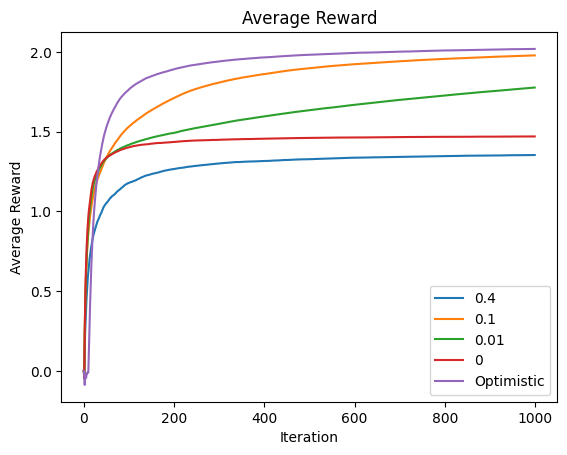

In [15]:

fig, ax = plt.subplots()
ax.plot(running_avg_reward_4_epsilon)
ax.plot(running_avg_reward)
ax.plot(running_avg_reward_01_epsilon)
ax.plot(running_avg_reward_0_epsilon)
ax.plot(running_avg_reward_optimistic)
ax.set_title("Average Reward")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Reward")
ax.legend(["0.4", "0.1", "0.01", "0", "Optimistic"])
plt.show()

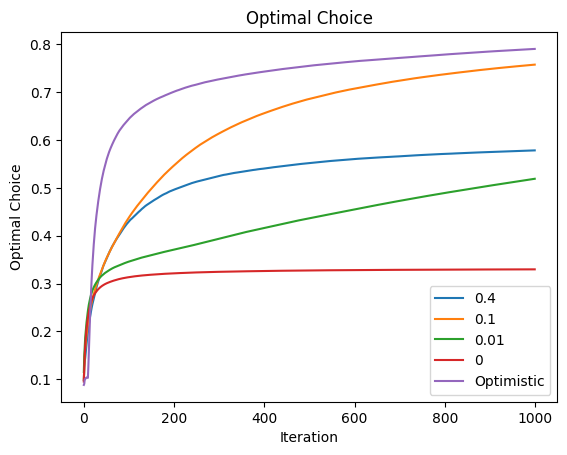

In [16]:
fig, ax = plt.subplots()
ax.plot(running_optimal_choice_percentage_4_epsilon)
ax.plot(running_optimal_choice_percentage)
ax.plot(running_optimal_choice_percentage_01_epsilon)
ax.plot(running_optimal_choice_percentage_0_epsilon)
ax.plot(running_optimal_choice_percentage_optimistic)
ax.set_title("Optimal Choice")
ax.set_xlabel("Iteration")
ax.set_ylabel("Optimal Choice")
ax.legend(["0.4", "0.1", "0.01", "0", "Optimistic"])
plt.show()